# Plot mensuel mxl GLORYS2V3 janvier


In [1]:
## imports

import numpy as np
import dask
import xarray as xr
import GriddedData
import time

#- Other modules
import os
from glob import glob
import numpy.ma as ma
import scipy as sc
import WavenumberSpectrum as ws
import dask.array as da
from netCDF4 import Dataset

### palette
from matplotlib.colors import LogNorm
import matplotlib.cm as mplcm
import colormap as cmaps
import matplotlib.cm as cm

import seaborn as sns

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## local/specific imports
import oocgcm
import oocgcm.filtering
import oocgcm.filtering.linearfilters as tf

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

%matplotlib inline

In [12]:
file="/media/extra/DATA/GLORYS/GLORYS2V3_NACHOS025_201001_mxl.nc"

ds=xr.open_dataset(file)
mxl=ds.somxl010[0]
lat=ds.nav_lat
lon=ds.nav_lon
mask=np.equal(mxl,99999.)

mxl_ma=np.ma.array(mxl,mask=mask)


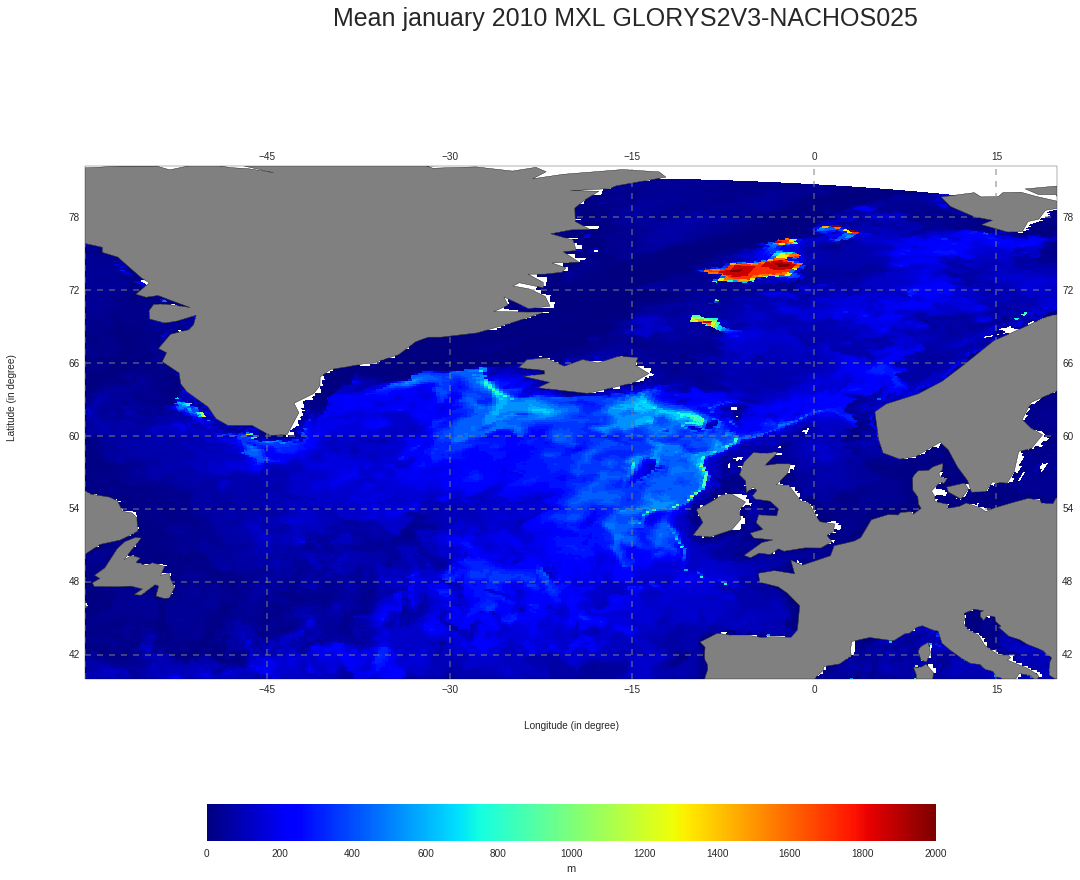

In [17]:

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
ax.set_extent([-60, 20, 40, 80])
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,mxl_ma,transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='m')

fig.suptitle("Mean january 2010 MXL GLORYS2V3-NACHOS025", fontsize=25)
plt.savefig("mxl_mean01_glorys2v3-nachos025.png")